In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import os

In [6]:
#libraries for data modelling
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
from xgboost.sklearn import XGBClassifier

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#libraries for data preprocessing
from sklearn.preprocessing import StandardScaler

In [13]:
#model for Dimentionality Reduction
from sklearn.decomposition import PCA

In [14]:
#libraries for performance measures
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.metrics import precision_recall_fscore_support

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.metrics import auc, roc_curve

In [18]:
#libraries For data splitting
from sklearn.model_selection import train_test_split

In [19]:
os.chdir("../input")

In [20]:
data_file = pd.read_csv("data.csv")

In [21]:
pd.options.display.max_columns = 200

In [22]:
data_file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
data_file.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [24]:
data_file.shape

(569, 33)

In [25]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [26]:
data_file.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [27]:
data_file.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [28]:
data_file.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
#dropping the unwanted coloumns
df=data_file.drop(['id','Unnamed: 32'],axis=1)

In [30]:
df.shape

(569, 31)

In [31]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [32]:
#Splitting the Features and Target Data into X and y
X =df.iloc[:,1:]
y=df.iloc[:,:1]

In [33]:
X.shape

(569, 30)

In [34]:
y.shape

(569, 1)

In [35]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [37]:
y=y.diagnosis.map({'M':1,'B':0})

In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [39]:
#Scale all numerical features in X  using sklearn's StandardScaler class
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
X_sc = scaler.fit_transform(X)

In [42]:
sca_x=pd.DataFrame(X_sc)

In [43]:
sca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [44]:
#Perform PCA on numeric features
from sklearn.decomposition import PCA


In [45]:
pca = PCA(n_components = 2)

In [46]:
pca=PCA(.95)

In [47]:
X=pca.fit_transform(sca_x)

In [48]:
X.shape

(569, 10)

In [49]:
#Split and shuffle data
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,shuffle=True)

In [51]:
#Create default classifiers
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
xgbc=XGBClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()

In [52]:
# Train data
dtc_train=dtc.fit(X_train,y_train)

In [53]:
knc_train=knc.fit(X_train,y_train)

In [54]:
xgbc_train=xgbc.fit(X_train,y_train)

In [55]:
etc_train=etc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
gbc_train=gbc.fit(X_train,y_train)

In [57]:
rfc_train=rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
# Make predictions
y_pred_dtc=dtc_train.predict(X_test)

In [59]:
y_pred_etc=etc_train.predict(X_test)

In [60]:
y_pred_rfc=rfc_train.predict(X_test)

In [61]:
y_pred_gbc=gbc_train.predict(X_test)

In [62]:
y_pred_xgbc=xgbc_train.predict(X_test)

In [63]:
y_pred_knc=knc_train.predict(X_test)

In [64]:
#Get probability values
y_pred_dtc_prob = dtc_train.predict_proba(X_test)
y_pred_rfc_prob = rfc_train.predict_proba(X_test)
y_pred_etc_prob = etc_train.predict_proba(X_test)
y_pred_knc_prob = knc_train.predict_proba(X_test)
y_pred_xgbc_prob = xgbc_train.predict_proba(X_test)
y_pred_gbc_prob= gbc_train.predict_proba(X_test)

In [65]:
#xi) Compare the performance of each of these models by calculating metrics as follows:: 
         #a) accuracy,
         #b) Precision & Recall,
         #c) F1 score,
         #d) AUC
        
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [66]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dtc)

0.9298245614035088

In [67]:
accuracy_score(y_test,y_pred_etc)

0.9649122807017544

In [68]:
accuracy_score(y_test,y_pred_rfc)

0.9649122807017544

In [69]:
accuracy_score(y_test,y_pred_gbc)

0.9649122807017544

In [70]:
accuracy_score(y_test,y_pred_xgbc)

0.956140350877193

In [71]:
accuracy_score(y_test,y_pred_knc)

0.9736842105263158

In [72]:
#Calculate Confusion Matrix
print("DecisionTreeClassifier: ")
confusion_matrix(y_test,y_pred_dtc)

DecisionTreeClassifier: 


array([[65,  5],
       [ 3, 41]])

In [73]:
print("RandomForestClassifier: ")
confusion_matrix(y_test,y_pred_rfc)

RandomForestClassifier: 


array([[68,  2],
       [ 2, 42]])

In [74]:
print("ExtraTreesClassifier: ")
confusion_matrix(y_test,y_pred_etc)

ExtraTreesClassifier: 


array([[69,  1],
       [ 3, 41]])

In [75]:
print("GradientBoostingClassifier: ")
confusion_matrix(y_test,y_pred_gbc)

GradientBoostingClassifier: 


array([[68,  2],
       [ 2, 42]])

In [76]:
print("KNeighborsClassifier: ")
confusion_matrix(y_test,y_pred_knc)

KNeighborsClassifier: 


array([[69,  1],
       [ 2, 42]])

In [77]:
print("XGBClassifier: ")
confusion_matrix(y_test,y_pred_xgbc)

XGBClassifier: 


array([[67,  3],
       [ 2, 42]])

In [78]:
#Get probability values
y_pred_dtc_prob = dtc_train.predict_proba(X_test)
y_pred_rfc_prob = rfc_train.predict_proba(X_test)
y_pred_etc_prob = etc_train.predict_proba(X_test)
y_pred_knc_prob = knc_train.predict_proba(X_test)
y_pred_xgbc_prob = xgbc_train.predict_proba(X_test)
y_pred_gbc_prob= gbc_train.predict_proba(X_test)

In [79]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dtc_prob[: , 1], pos_label= 1)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rfc_prob[: , 1], pos_label= 1)
fpr_etc, tpr_etc, thresholds = roc_curve(y_test, y_pred_rfc_prob[: , 1], pos_label= 1)
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y_pred_rfc_prob[: , 1], pos_label= 1)
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_xgbc_prob[: , 1], pos_label= 1)
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test, y_pred_gbc_prob[: , 1], pos_label= 1)

In [80]:
print("DecisionTreeClassifier")
auc(fpr_dt,tpr_dt)

DecisionTreeClassifier


0.9301948051948051

In [81]:
print("RandomForestClassifier")
auc(fpr_rf,tpr_rf)

RandomForestClassifier


0.9772727272727273

In [82]:
print("ExtraTreesClassifier")
auc(fpr_etc,tpr_etc)

ExtraTreesClassifier


0.9772727272727273

In [83]:
print("GradientBoostingClassifier")
auc(fpr_gbm,tpr_gbm)



GradientBoostingClassifier


0.9883116883116884

In [84]:
print("KNeighborsClassifier")
auc(fpr_knc,tpr_knc)



KNeighborsClassifier


0.9772727272727273

In [85]:
print("XGBClassifier")
auc(fpr_xg,tpr_xg)

XGBClassifier


0.9918831168831168

In [86]:
print("DecisionTreeClassifier: ")
precision_recall_fscore_support(y_test,y_pred_dtc)

DecisionTreeClassifier: 


(array([0.95588235, 0.89130435]),
 array([0.92857143, 0.93181818]),
 array([0.94202899, 0.91111111]),
 array([70, 44]))

In [87]:
print("RandomForestClassifier: ")
precision_recall_fscore_support(y_test,y_pred_rfc)

RandomForestClassifier: 


(array([0.97142857, 0.95454545]),
 array([0.97142857, 0.95454545]),
 array([0.97142857, 0.95454545]),
 array([70, 44]))

In [88]:
print("ExtraTreesClassifier: ")
precision_recall_fscore_support(y_test,y_pred_etc)

ExtraTreesClassifier: 


(array([0.95833333, 0.97619048]),
 array([0.98571429, 0.93181818]),
 array([0.97183099, 0.95348837]),
 array([70, 44]))

In [89]:
print("GradientBoostingClassifier: ")
precision_recall_fscore_support(y_test,y_pred_gbc)

GradientBoostingClassifier: 


(array([0.97142857, 0.95454545]),
 array([0.97142857, 0.95454545]),
 array([0.97142857, 0.95454545]),
 array([70, 44]))

In [90]:
print("KNeighborsClassifier: ")
precision_recall_fscore_support(y_test,y_pred_knc)

KNeighborsClassifier: 


(array([0.97183099, 0.97674419]),
 array([0.98571429, 0.95454545]),
 array([0.9787234 , 0.96551724]),
 array([70, 44]))

In [91]:
print("XGBClassifier: ")
precision_recall_fscore_support(y_test,y_pred_xgbc)

XGBClassifier: 


(array([0.97101449, 0.93333333]),
 array([0.95714286, 0.95454545]),
 array([0.96402878, 0.94382022]),
 array([70, 44]))

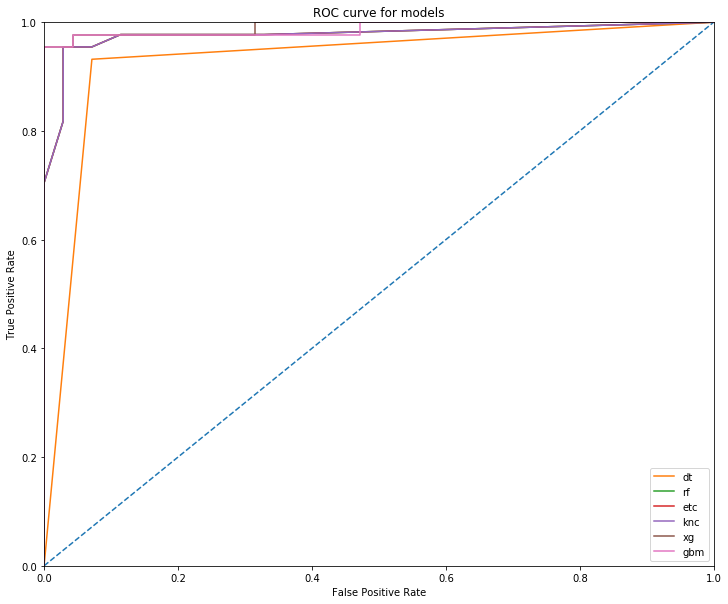

In [92]:
#Plot ROC curve now
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line

# Labels etc
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

# Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Plot each graph now
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")

# Set legend and show plot
ax.legend(loc="lower right")
plt.show()